In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import f_oneway
from scipy import stats

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv(r"C:\Users\srini\Documents\ADTA 5410\owid-covid-data.csv")
print(data.shape)
data.head()


(429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
columns = ['date', 'continent', 'location',  'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
           'total_cases_per_million', 'total_deaths_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'gdp_per_capita', 'population_density', 'median_age', 
           'life_expectancy', 'stringency_index', 'hospital_beds_per_thousand', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million',
           'human_development_index', 'aged_70_older', 'total_tests_per_thousand', 'total_boosters_per_hundred','cardiovasc_death_rate', 'diabetes_prevalence', 
           'female_smokers', 'male_smokers', 'excess_mortality_cumulative_per_million']

filtered_data = data[columns]
print(filtered_data.shape)
filtered_data.head()


(429435, 27)


,date,continent,location,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_cases_per_million,total_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,gdp_per_capita,population_density,median_age,life_expectancy,stringency_index,hospital_beds_per_thousand,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,human_development_index,aged_70_older,total_tests_per_thousand,total_boosters_per_hundred,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_per_million
0,2020-01-05,Asia,Afghanistan,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1803.987,54.422,18.6,64.83,0.0,0.5,NaN,NaN,0.511,1.337,NaN,NaN,597.029,9.59,NaN,NaN,NaN
1,2020-01-06,Asia,Afghanistan,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1803.987,54.422,18.6,64.83,0.0,0.5,NaN,NaN,0.511,1.337,NaN,NaN,597.029,9.59,NaN,NaN,NaN
2,2020-01-07,Asia,Afghanistan,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1803.987,54.422,18.6,64.83,0.0,0.5,NaN,NaN,0.511,1.337,NaN,NaN,597.029,9.59,NaN,NaN,NaN
3,2020-01-08,Asia,Afghanistan,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1803.987,54.422,18.6,64.83,0.0,0.5,NaN,NaN,0.511,1.337,NaN,NaN,597.029,9.59,NaN,NaN,NaN
4,2020-01-09,Asia,Afghanistan,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1803.987,54.422,18.6,64.83,0.0,0.5,NaN,NaN,0.511,1.337,NaN,NaN,597.029,9.59,NaN,NaN,NaN


In [5]:
print("Unique Locations in Dataset: ", filtered_data['location'].nunique())

Unique Locations in Dataset:  255


In [6]:
filtered_data.describe()

,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_cases_per_million,total_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,gdp_per_capita,population_density,median_age,life_expectancy,stringency_index,hospital_beds_per_thousand,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,human_development_index,aged_70_older,total_tests_per_thousand,total_boosters_per_hundred,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_per_million
count,85417.000000,81132.000000,78061.000000,411804.000000,411804.000000,39116.000000,40656.000000,328292.000000,360492.000000,334663.000000,390299.000000,196190.000000,290689.000000,10993.000000,24497.000000,319127.000000,331315.000000,79387.000000,53600.000000,328865.000000,345911.000000,247165.000000,243817.000000,13411.000000
mean,124.279558,53.501409,48.680182,112096.199396,835.514313,15.656340,125.988007,18904.182986,394.073095,30.456296,73.702098,42.877560,3.106912,9.671944,82.619130,0.722139,5.486843,924.254762,36.301489,264.639387,8.556055,10.772465,33.097723,1772.666400
std,85.098042,29.379655,29.042282,162240.412419,1134.932671,22.785489,151.155812,19829.578099,1785.451215,9.093554,7.387914,24.870492,2.549205,13.574017,88.396751,0.148903,4.136342,2195.428504,30.218208,120.756836,4.934656,10.761080,13.853948,1991.892769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,661.240000,0.137000,15.100000,53.280000,0.000000,0.100000,0.000000,0.000000,0.394000,0.526000,0.000000,0.000000,79.370000,0.990000,0.100000,7.700000,-2936.453100
25%,44.770000,27.880000,21.220000,1916.100500,24.568000,2.328000,30.997000,4227.630000,37.728000,22.200000,69.500000,22.220000,1.300000,1.549000,23.728000,0.602000,2.063000,43.585500,5.920000,175.695000,5.350000,1.900000,22.600000,116.872242
50%,130.550000,64.300000,57.920000,29145.475000,295.089000,6.434000,74.236000,12294.876000,88.125000,29.700000,75.050000,42.850000,2.500000,4.645000,56.277000,0.740000,3.871000,234.141000,35.905000,245.465000,7.200000,6.300000,33.100000,1270.801400
75%,194.990000,77.780000,73.610000,156770.190000,1283.817000,18.779250,159.758250,27216.445000,222.873000,38.700000,79.460000,62.040000,4.210000,12.651000,109.998000,0.829000,8.643000,894.374500,57.620000,333.436000,10.790000,19.300000,41.500000,2883.024150
max,410.230000,129.070000,126.890000,763598.600000,6601.110000,180.675000,1526.846000,116935.600000,20546.766000,48.200000,86.750000,100.000000,13.800000,224.976000,717.077000,0.957000,18.493000,32925.826000,150.470000,724.417000,30.530000,44.000000,78.100000,10293.515000


In [7]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     429435 non-null  object 
 1   continent                                402910 non-null  object 
 2   location                                 429435 non-null  object 
 3   total_vaccinations_per_hundred           85417 non-null   float64
 4   people_vaccinated_per_hundred            81132 non-null   float64
 5   people_fully_vaccinated_per_hundred      78061 non-null   float64
 6   total_cases_per_million                  411804 non-null  float64
 7   total_deaths_per_million                 411804 non-null  float64
 8   icu_patients_per_million                 39116 non-null   float64
 9   hosp_patients_per_million                40656 non-null   float64
 10  gdp_per_capita                  

In [8]:
# Convert the 'date' column to datetime if it exists in the data
if 'date' in filtered_data.columns:
    filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Ensure the data is sorted by date
filtered_data = filtered_data.sort_values(by='date').reset_index(drop=True)

# Calculate the number of weeks since the start date
filtered_data['week_continuous'] = ((filtered_data['date'] - filtered_data['date'].min()).dt.days // 7) + 1
filtered_data.head()


,date,continent,location,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_cases_per_million,total_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,gdp_per_capita,population_density,median_age,life_expectancy,stringency_index,hospital_beds_per_thousand,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,human_development_index,aged_70_older,total_tests_per_thousand,total_boosters_per_hundred,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_per_million,week_continuous
0,2020-01-01,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17336.469,66.444,29.3,75.05,0.0,1.38,NaN,NaN,0.779,4.321,0.000,NaN,152.783,13.06,6.9,21.4,NaN,1
1,2020-01-01,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18933.907,16.177,31.9,76.67,0.0,5.00,NaN,NaN,0.845,7.441,0.000,NaN,191.032,5.50,16.2,27.7,NaN,1
2,2020-01-02,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17336.469,66.444,29.3,75.05,0.0,1.38,NaN,NaN,0.779,4.321,0.001,NaN,152.783,13.06,6.9,21.4,NaN,1
3,2020-01-02,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18933.907,16.177,31.9,76.67,0.0,5.00,NaN,NaN,0.845,7.441,0.002,NaN,191.032,5.50,16.2,27.7,NaN,1
4,2020-01-03,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17336.469,66.444,29.3,75.05,0.0,1.38,NaN,NaN,0.779,4.321,0.001,NaN,152.783,13.06,6.9,21.4,NaN,1


In [9]:
def first_non_null(series):
    # Return the first non-null value, or NaN if all are null
    return series.dropna().iloc[0] if series.notna().any() else float('nan')

# Update the aggregation dictionary with custom functions for relevant columns
agg_dict = {
    'total_cases_per_million': 'sum',
    'total_deaths_per_million': 'sum',
    'weekly_icu_admissions_per_million': 'sum',
    'weekly_hosp_admissions_per_million': 'sum',
    'total_tests_per_thousand': 'sum',
    'total_vaccinations_per_hundred': 'sum', 
    'people_vaccinated_per_hundred': 'sum', 
    'people_fully_vaccinated_per_hundred': 'sum',
    'total_boosters_per_hundred': 'sum', 
    'cardiovasc_death_rate': 'mean', 
    'diabetes_prevalence': 'mean', 
    'female_smokers': 'mean', 
    'male_smokers': 'mean',
    'icu_patients_per_million': 'mean',  # Average if data is present
    'hosp_patients_per_million': 'mean',  # Average if data is present
    'gdp_per_capita': first_non_null,  # First non-null value if data is present
    'population_density': first_non_null,  # First non-null value if data is present
    'median_age': first_non_null,  # First non-null value if data is present
    'life_expectancy': first_non_null,  # First non-null value if data is present
    'stringency_index': 'mean',  # Average if data is present
    'hospital_beds_per_thousand': first_non_null,  # First non-null value if data is present
    'human_development_index': first_non_null,  # First non-null value if data is present
    'aged_70_older': first_non_null,  # First non-null value if data is present
    'excess_mortality_cumulative_per_million': 'mean'  # Average if data is present
}

# Group by 'continent', 'location', and 'week' and apply the custom aggregation functions
weekly_data = filtered_data.groupby(['continent', 'location', 'week_continuous']).agg(agg_dict).reset_index()

# Display the result
print(len(weekly_data))
weekly_data.head()


57565


,continent,location,week_continuous,total_cases_per_million,total_deaths_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests_per_thousand,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,icu_patients_per_million,hosp_patients_per_million,gdp_per_capita,population_density,median_age,life_expectancy,stringency_index,hospital_beds_per_thousand,human_development_index,aged_70_older,excess_mortality_cumulative_per_million
0,Africa,Algeria,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.364,6.73,0.7,30.4,NaN,NaN,13913.839,17.348,29.1,76.88,0.0,1.9,0.748,3.857,NaN
1,Africa,Algeria,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.364,6.73,0.7,30.4,NaN,NaN,13913.839,17.348,29.1,76.88,0.0,1.9,0.748,3.857,NaN
2,Africa,Algeria,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.364,6.73,0.7,30.4,NaN,NaN,13913.839,17.348,29.1,76.88,0.0,1.9,0.748,3.857,NaN
3,Africa,Algeria,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.364,6.73,0.7,30.4,NaN,NaN,13913.839,17.348,29.1,76.88,0.0,1.9,0.748,3.857,NaN
4,Africa,Algeria,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.364,6.73,0.7,30.4,NaN,NaN,13913.839,17.348,29.1,76.88,0.0,1.9,0.748,3.857,2.280695


In [10]:
# Identify countries with at least one non-null value in 'excess_mortality_cumulative_per_million'
countries_with_data_weekly = weekly_data.groupby('location')['excess_mortality_cumulative_per_million'].transform('any')

# Filter the data to keep only countries with at least one non-null value in the specified column
data_filtered_weekly = weekly_data[countries_with_data_weekly]

# Display the result
print("Total Count: ", len(data_filtered_weekly))
print("Null excess_mortality_cumulative_per_million % : ", data_filtered_weekly['excess_mortality_cumulative_per_million'].isna().sum()*100/len(data_filtered_weekly))


Total Count:  30073
Null excess_mortality_cumulative_per_million % :  55.40518072689788


In [11]:
#Finding which rows has missing values and storing it in a dict
missing_dict = dict(data_filtered_weekly.isnull().sum()*100/len(data_filtered_weekly))
missing_dict

{'continent': 0.0,
 'location': 0.0,
 'week_continuous': 0.0,
 'total_cases_per_million': 0.0,
 'total_deaths_per_million': 0.0,
 'weekly_icu_admissions_per_million': 0.0,
 'weekly_hosp_admissions_per_million': 0.0,
 'total_tests_per_thousand': 0.0,
 'total_vaccinations_per_hundred': 0.0,
 'people_vaccinated_per_hundred': 0.0,
 'people_fully_vaccinated_per_hundred': 0.0,
 'total_boosters_per_hundred': 0.0,
 'cardiovasc_death_rate': 13.141356033651448,
 'diabetes_prevalence': 7.408638978485685,
 'female_smokers': 24.955940544674625,
 'male_smokers': 25.753998603398397,
 'icu_patients_per_million': 79.48990789079906,
 'hosp_patients_per_million': 80.49413094802647,
 'gdp_per_capita': 11.814584511023178,
 'population_density': 4.632061982509228,
 'median_age': 7.980580587237721,
 'life_expectancy': 0.7980580587237721,
 'stringency_index': 43.10511089681774,
 'hospital_beds_per_thousand': 16.177301898713132,
 'human_development_index': 13.793103448275861,
 'aged_70_older': 9.57669670468526

In [12]:
# Checking the columns which has more than 50% of missing data and if they are needed
check_col = []
for feature,mc in missing_dict.items():
    if mc>50:
        check_col.append(feature)

check_col

['icu_patients_per_million',
 'hosp_patients_per_million',
 'excess_mortality_cumulative_per_million']

In [13]:
# Assuming 'location' and 'gdp_per_capita' are columns in the DataFrame `df`
aggregated_gdp = data_filtered_weekly.groupby('location')['gdp_per_capita'].mean()
aggregated_gdp_dict = aggregated_gdp.to_dict()
# Print the resulting dictionary
print(aggregated_gdp_dict)


{'Albania': 11803.431, 'Algeria': 13913.839, 'Andorra': nan, 'Antigua and Barbuda': 21490.943000000003, 'Argentina': 18933.907, 'Armenia': 8787.58, 'Aruba': 35973.781, 'Australia': 44648.71, 'Austria': 45436.686, 'Azerbaijan': 15847.419, 'Bahamas': 27717.847, 'Barbados': 16978.068, 'Belarus': 17167.967, 'Belgium': 42658.576, 'Belize': 7824.362, 'Bermuda': 50669.31500000001, 'Bhutan': 8708.597, 'Bolivia': 6885.829, 'Bosnia and Herzegovina': 11713.895, 'Brazil': 14103.452, 'Brunei': 71809.251, 'Bulgaria': 18563.306999999997, 'Canada': 44017.591, 'Cape Verde': 6222.554, 'Chile': 22767.037, 'Colombia': 13254.949, 'Costa Rica': 15524.995, 'Croatia': 22669.797, 'Cuba': nan, 'Cyprus': 32415.132, 'Czechia': 32605.906, 'Denmark': 46682.515, 'Dominican Republic': 14600.861, 'Ecuador': 10581.936, 'Egypt': 10550.206, 'El Salvador': 7292.458, 'Estonia': 29481.252, 'Faroe Islands': nan, 'Fiji': 8702.975, 'Finland': 40585.721, 'France': 38605.671, 'French Guiana': nan, 'French Polynesia': nan, 'Georg

In [14]:
# Getting all the location with no gdp across any records for the location
keys_gdp = []
for k,v in aggregated_gdp_dict.items():
  if math.isnan(v):
    keys_gdp.append(k)
    
print("Countries with no gdp_per_capita data: ", len(keys_gdp))
keys_gdp

Countries with no gdp_per_capita data:  15


['Andorra',
 'Cuba',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Liechtenstein',
 'Martinique',
 'Mayotte',
 'Monaco',
 'New Caledonia',
 'Reunion',
 'Taiwan']

In [15]:
# Filtering out records with location without single value in gdp
data_filtered_weekly = data_filtered_weekly[~data_filtered_weekly['location'].isin(keys_gdp)]
print(data_filtered_weekly.shape)
data_filtered_weekly.head(1)

(26520, 27)


,continent,location,week_continuous,total_cases_per_million,total_deaths_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests_per_thousand,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,icu_patients_per_million,hosp_patients_per_million,gdp_per_capita,population_density,median_age,life_expectancy,stringency_index,hospital_beds_per_thousand,human_development_index,aged_70_older,excess_mortality_cumulative_per_million
0,Africa,Algeria,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.364,6.73,0.7,30.4,NaN,NaN,13913.839,17.348,29.1,76.88,0.0,1.9,0.748,3.857,NaN


In [16]:
data_filtered_weekly.isna().sum()

continent                                      0
location                                       0
week_continuous                                0
total_cases_per_million                        0
total_deaths_per_million                       0
weekly_icu_admissions_per_million              0
weekly_hosp_admissions_per_million             0
total_tests_per_thousand                       0
total_vaccinations_per_hundred                 0
people_vaccinated_per_hundred                  0
people_fully_vaccinated_per_hundred            0
total_boosters_per_hundred                     0
cardiovasc_death_rate                       1312
diabetes_prevalence                          355
female_smokers                              4432
male_smokers                                4672
icu_patients_per_million                   20352
hosp_patients_per_million                  20814
gdp_per_capita                                 0
population_density                             0
median_age          

In [17]:
# Frontfilling and Backfilling specific columns based on their location values
columns_to_fill = [
    'cardiovasc_death_rate', 
    'diabetes_prevalence', 
    'female_smokers', 
    'male_smokers', 
    'icu_patients_per_million', 
    'hosp_patients_per_million', 
    'median_age', 
    'life_expectancy', 
    'stringency_index', 
    'hospital_beds_per_thousand', 
    'human_development_index', 
    'aged_70_older',
    'excess_mortality_cumulative_per_million',
    'total_cases_per_million',
    'total_deaths_per_million',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred'
]

for column in columns_to_fill:
    data_filtered_weekly[column] = data_filtered_weekly.groupby('location')[column].ffill()
    data_filtered_weekly[column] = data_filtered_weekly.groupby('location')[column].bfill()


In [18]:
print(len(data_filtered_weekly))
data_filtered_weekly.isna().sum()

26520


continent                                      0
location                                       0
week_continuous                                0
total_cases_per_million                        0
total_deaths_per_million                       0
weekly_icu_admissions_per_million              0
weekly_hosp_admissions_per_million             0
total_tests_per_thousand                       0
total_vaccinations_per_hundred                 0
people_vaccinated_per_hundred                  0
people_fully_vaccinated_per_hundred            0
total_boosters_per_hundred                     0
cardiovasc_death_rate                       1312
diabetes_prevalence                          355
female_smokers                              4432
male_smokers                                4672
icu_patients_per_million                   17393
hosp_patients_per_million                  18113
gdp_per_capita                                 0
population_density                             0
median_age          

In [19]:
# Define the columns and their fill methods
columns_to_fill = {
    'female_smokers': ['ffill', 'bfill'],
    'male_smokers': ['ffill', 'bfill'],
    'median_age': ['ffill', 'bfill'],
    'life_expectancy': ['ffill', 'bfill'],
    'stringency_index': ['ffill', 'bfill'],
    'hospital_beds_per_thousand': ['ffill', 'bfill'],
    'aged_70_older': ['ffill', 'bfill'],
    'excess_mortality_cumulative_per_million': ['ffill', 'bfill'],
    'cardiovasc_death_rate': ['ffill', 'bfill'],
    'diabetes_prevalence': ['ffill', 'bfill'],
    'human_development_index': ['ffill', 'bfill'],
    'icu_patients_per_million': ['ffill', 'bfill'],
    'hosp_patients_per_million': ['ffill', 'bfill'],
    'total_cases_per_million': ['ffill', 'bfill'],
    'total_deaths_per_million': ['ffill', 'bfill'],
    'weekly_icu_admissions_per_million': ['ffill', 'bfill'],
    'weekly_hosp_admissions_per_million': ['ffill', 'bfill'],
    'total_tests_per_thousand': ['ffill', 'bfill'],
    'total_vaccinations_per_hundred': ['ffill', 'bfill'],
    'people_vaccinated_per_hundred': ['ffill', 'bfill'],
    'people_fully_vaccinated_per_hundred': ['ffill', 'bfill'],
    'total_boosters_per_hundred': ['ffill', 'bfill'],
    
}

# Apply the fill methods
for column, method in columns_to_fill.items():
    if isinstance(method, list):  # If there are multiple methods for a column
        for m in method:
            data_filtered_weekly[column].fillna(method=m, inplace=True)
    else:
        data_filtered_weekly[column].fillna(method=method, inplace=True)


In [20]:
data_filtered_weekly.isna().sum()

continent                                  0
location                                   0
week_continuous                            0
total_cases_per_million                    0
total_deaths_per_million                   0
weekly_icu_admissions_per_million          0
weekly_hosp_admissions_per_million         0
total_tests_per_thousand                   0
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred              0
people_fully_vaccinated_per_hundred        0
total_boosters_per_hundred                 0
cardiovasc_death_rate                      0
diabetes_prevalence                        0
female_smokers                             0
male_smokers                               0
icu_patients_per_million                   0
hosp_patients_per_million                  0
gdp_per_capita                             0
population_density                         0
median_age                                 0
life_expectancy                            0
stringency

In [21]:
print("Unique Locations in Dataset: ", data_filtered_weekly['location'].nunique())

Unique Locations in Dataset:  111


In [22]:
pd.DataFrame(data_filtered_weekly.groupby(['location', 'gdp_per_capita']).size().reset_index()).describe()

,gdp_per_capita,0
count,111.000000,111.000000
mean,28032.824018,238.918919
std,21799.175186,11.876742
min,2896.913000,115.000000
25%,11822.138500,240.000000
50%,22767.037000,240.000000
75%,37237.016000,240.000000
max,116935.600000,242.000000


In [23]:
# Define GDP per capita thresholds (values can be adjusted based on research or context)
gdp_thresholds = {
    'Underdeveloped Countries': 15000,  # GDP < $15,000
    'Developing Countries': 32500,    # $1,000 <= GDP < $32,500
    'Developed Countries': float('inf')  # GDP >= $32,500
}

# Categorize countries based on GDP per capita
def categorize_country(gdp):
    for category, threshold in gdp_thresholds.items():
        if gdp <= threshold:
            return category

data_filtered_weekly['development_status'] = data_filtered_weekly['gdp_per_capita'].apply(categorize_country)


In [24]:
# Total count of records based on development_status
data_filtered_weekly['development_status'].value_counts()

development_status
Underdeveloped Countries    9360
Developed Countries         8755
Developing Countries        8405
Name: count, dtype: int64

In [25]:
data_filtered_weekly_num = data_filtered_weekly.drop(columns=['continent', 'location', 'week_continuous'], errors='ignore')
data_filtered_weekly_numeric = data_filtered_weekly.drop(columns=['continent', 'location', 'week_continuous', 'development_status'], errors='ignore')

In [26]:
# Count of unique Location based on development_status
pd.DataFrame(data_filtered_weekly.groupby(['location', 'development_status']).size().reset_index())['development_status'].value_counts() 

development_status
Underdeveloped Countries    39
Developed Countries         37
Developing Countries        35
Name: count, dtype: int64

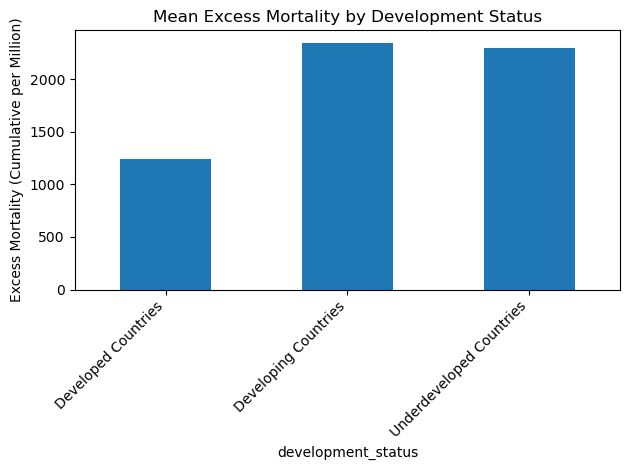

In [27]:
# Bar plot for excess mortality across development categories
category_summary = data_filtered_weekly.groupby('development_status')['excess_mortality_cumulative_per_million'].mean()
category_summary.plot(kind='bar', title='Mean Excess Mortality by Development Status')
plt.ylabel('Excess Mortality (Cumulative per Million)')

# Rotate x-axis labels to make them slanted
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align text to the right

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


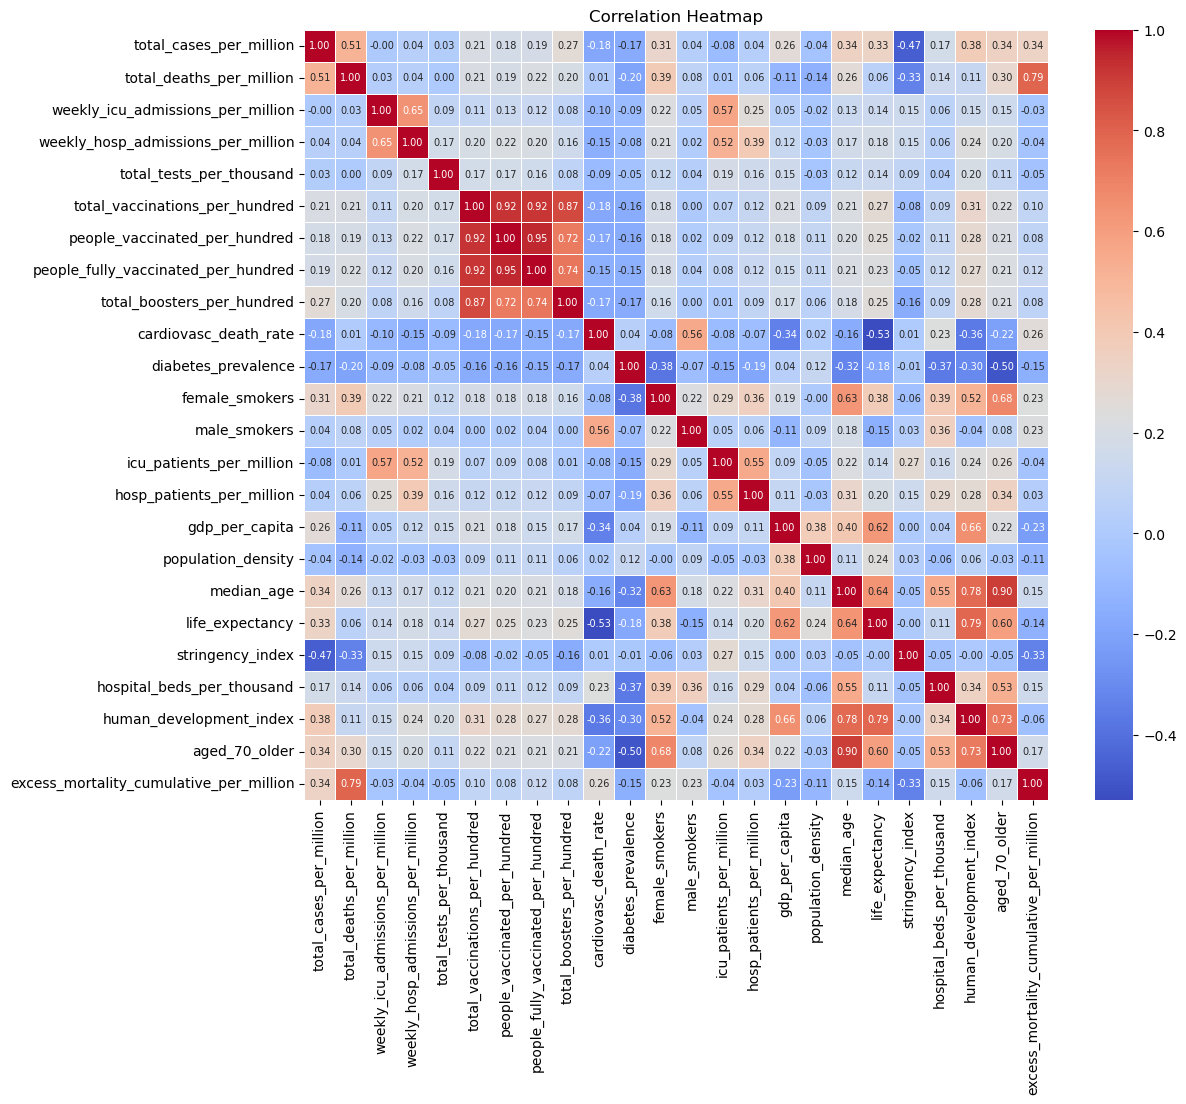

In [28]:
# Heatmap - Correlation Matrix
correlation_matrix = data_filtered_weekly_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7}, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

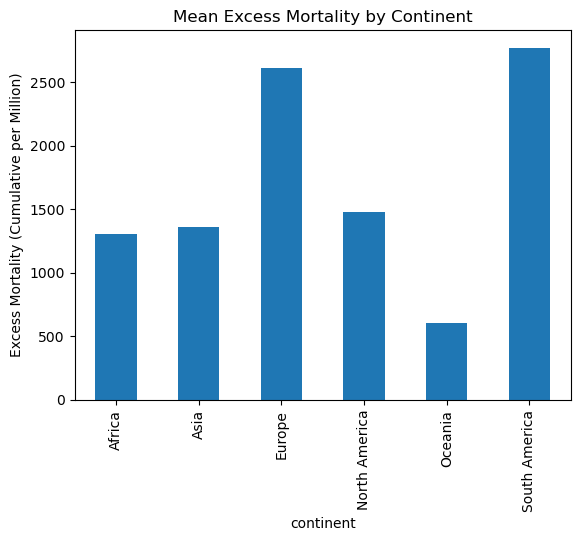

In [29]:
# Bar plot - continent vs excess_mortality_cumulative_per_million comparison
# Group by continent and calculate mean excess mortality
continent_summary = data_filtered_weekly.groupby('continent')['excess_mortality_cumulative_per_million'].mean()
continent_summary.plot(kind='bar', title='Mean Excess Mortality by Continent')
plt.ylabel('Excess Mortality (Cumulative per Million)')
plt.show()


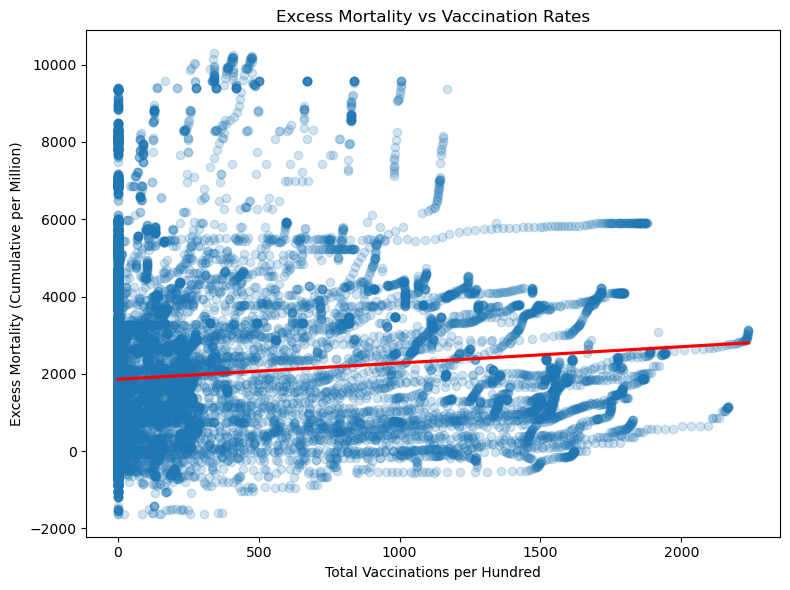

In [30]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=data_filtered_weekly,
    x='total_vaccinations_per_hundred',
    y='excess_mortality_cumulative_per_million',
    scatter_kws={'alpha': 0.2},  # Adjust transparency for better visibility
    line_kws={'color': 'red'},  # Line color
    ci=None  # No confidence interval shading
)
plt.title('Excess Mortality vs Vaccination Rates')
plt.xlabel('Total Vaccinations per Hundred')
plt.ylabel('Excess Mortality (Cumulative per Million)')
plt.tight_layout()
plt.show()


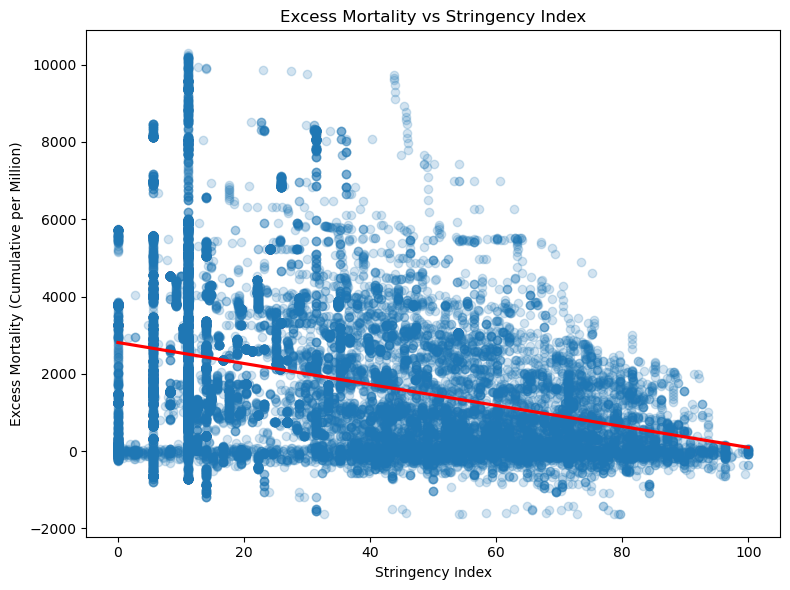

In [31]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=data_filtered_weekly,
    x='stringency_index',
    y='excess_mortality_cumulative_per_million',
    scatter_kws={'alpha': 0.2},  # Adjust transparency for better visibility
    line_kws={'color': 'red'},  # Line color
    ci=None  # No confidence interval shading
)
plt.title('Excess Mortality vs Stringency Index')
plt.xlabel('Stringency Index')
plt.ylabel('Excess Mortality (Cumulative per Million)')
plt.tight_layout()
plt.show()


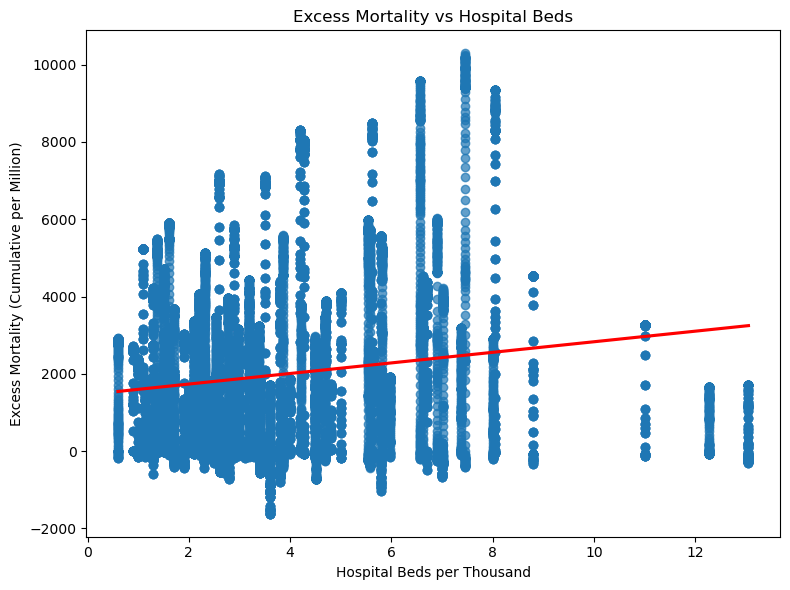

In [32]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=data_filtered_weekly,
    x='hospital_beds_per_thousand',
    y='excess_mortality_cumulative_per_million',
    scatter_kws={'alpha': 0.7},  # Adjust transparency for better visibility
    line_kws={'color': 'red'},  # Line color
    ci=None  # No confidence interval shading
)
plt.title('Excess Mortality vs Hospital Beds')
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Excess Mortality (Cumulative per Million)')
plt.tight_layout()
plt.show()


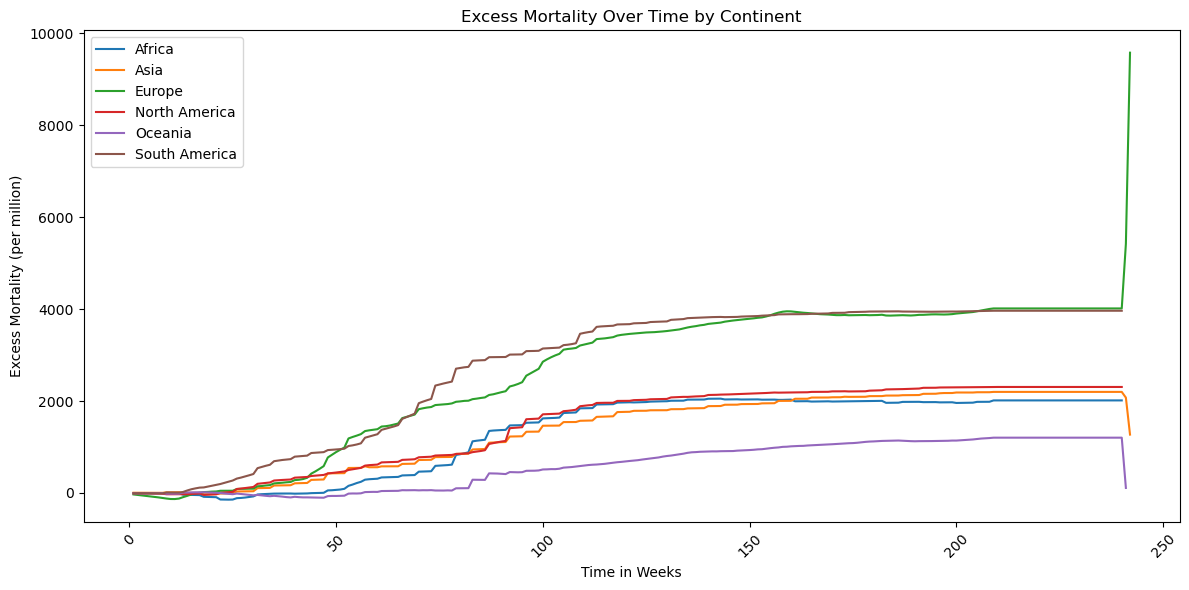

In [33]:
# TimeSeries - excess_mortality_cumulative_per_million Over Time by Continent
plt.figure(figsize=(12, 6))
for continent in data_filtered_weekly['continent'].unique():
    continent_data = data_filtered_weekly[data_filtered_weekly['continent'] == continent].groupby('week_continuous')['excess_mortality_cumulative_per_million'].mean()
    plt.plot(continent_data.index, continent_data.values, label=continent)

plt.title('Excess Mortality Over Time by Continent')
plt.xlabel('Time in Weeks')
plt.ylabel('Excess Mortality (per million)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

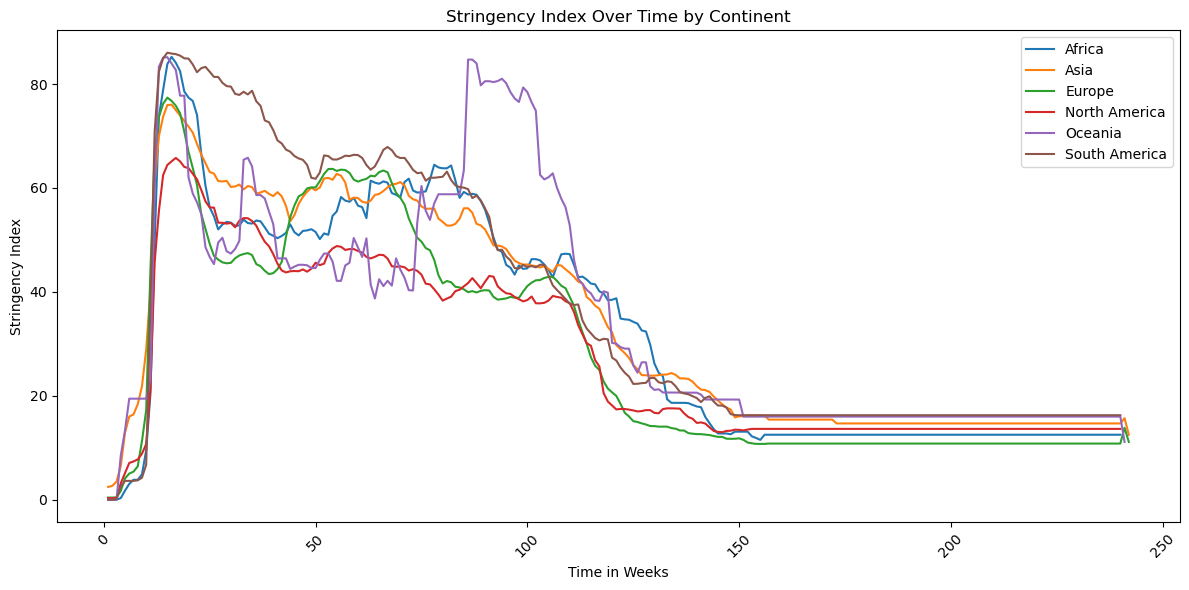

In [34]:
# TimeSeries - Stringency Index Over Time by Continent
plt.figure(figsize=(12, 6))
for continent in data_filtered_weekly['continent'].unique():
    continent_data = data_filtered_weekly[data_filtered_weekly['continent'] == continent].groupby('week_continuous')['stringency_index'].mean()
    plt.plot(continent_data.index, continent_data.values, label=continent)

plt.title('Stringency Index Over Time by Continent')
plt.xlabel('Time in Weeks')
plt.ylabel('Stringency Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

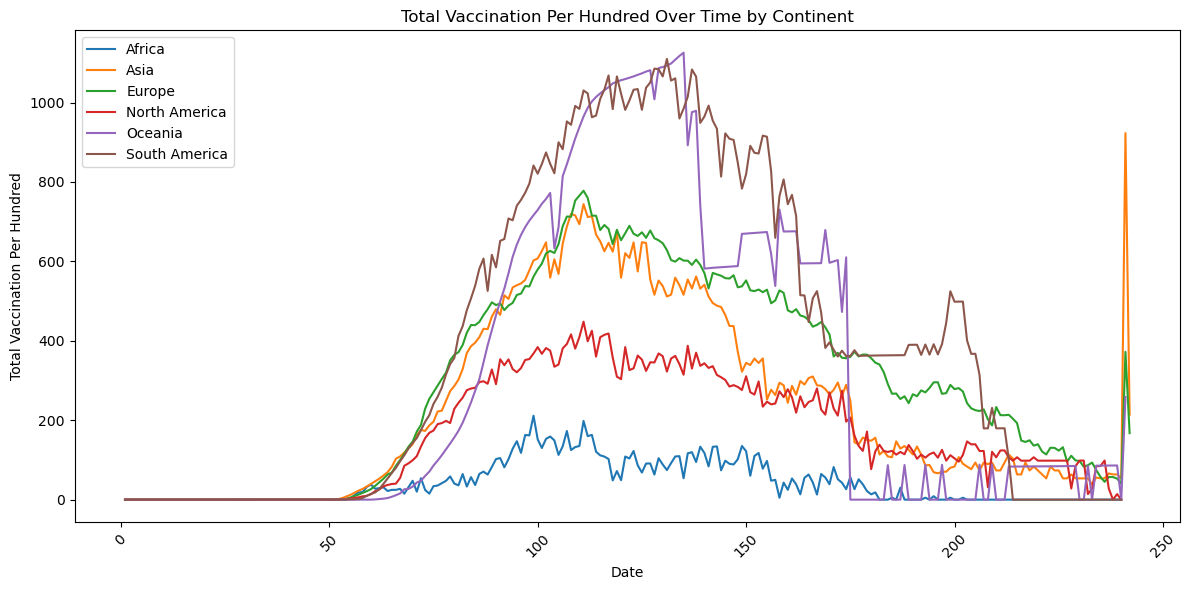

In [35]:
# TimeSeries - total_vaccinations_per_hundred Over Time by Continent
plt.figure(figsize=(12, 6))
for continent in data_filtered_weekly['continent'].unique():
    continent_data = data_filtered_weekly[data_filtered_weekly['continent'] == continent].groupby('week_continuous')['total_vaccinations_per_hundred'].mean()
    plt.plot(continent_data.index, continent_data.values, label=continent)

plt.title('Total Vaccination Per Hundred Over Time by Continent')
plt.xlabel('Date')
plt.ylabel('Total Vaccination Per Hundred')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

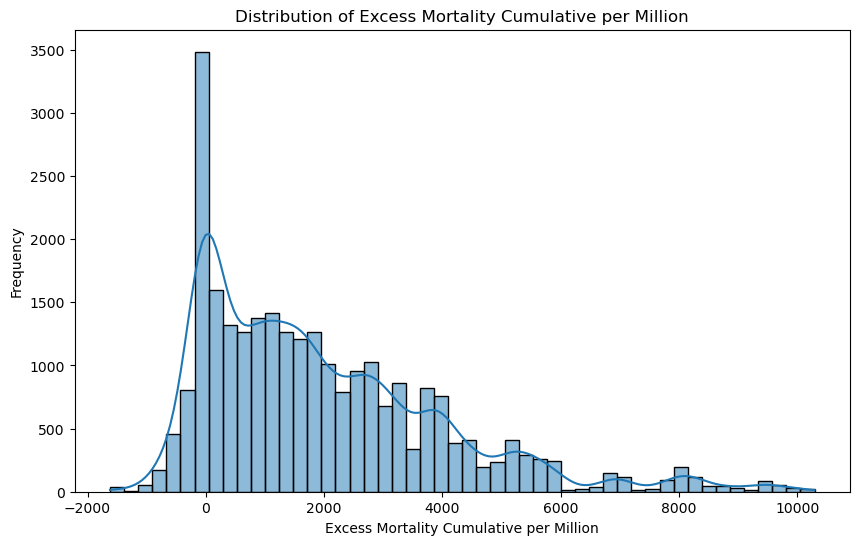

In [36]:
# Plot the distribution of the target variable
plt.figure(figsize=(10,6))
sns.histplot(data_filtered_weekly['excess_mortality_cumulative_per_million'], bins=50, kde=True)
plt.title('Distribution of Excess Mortality Cumulative per Million')
plt.xlabel('Excess Mortality Cumulative per Million')
plt.ylabel('Frequency')
plt.show()


# Models

In [38]:
# ANOVA to compare excess mortality between categories
anova_results = f_oneway(
    *[data_filtered_weekly[data_filtered_weekly['development_status'] == category]['excess_mortality_cumulative_per_million'].dropna()
      for category in gdp_thresholds.keys()]
)
print("ANOVA Results: ", anova_results)


ANOVA Results:  F_onewayResult(statistic=861.007930203118, pvalue=0.0)


In [39]:
# Perform Tukey's HSD to demonstrate the the mean of development_stats(AKA. GDP Category). We reject 1st and 2nd comparison that it is not same
tukey_results = pairwise_tukeyhsd(
    data_filtered_weekly['excess_mortality_cumulative_per_million'],
    data_filtered_weekly['development_status']
)
print(tukey_results)
# Since the p-value is 0 (very close to zero), there is strong evidence to reject the null hypothesis. 
# This means there are statistically significant differences in excess mortality rates between the categories of development status (e.g., Developed, Developing, Underdeveloped).
# The large F-statistic (861.0079) suggests that the variation in excess mortality rates is much greater between the categories than within the categories

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
       group1                 group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------
 Developed Countries     Developing Countries 1108.9259    0.0  1037.381 1180.4708   True
 Developed Countries Underdeveloped Countries 1058.2898    0.0   988.632 1127.9477   True
Developing Countries Underdeveloped Countries  -50.6361 0.2106 -121.0393   19.7672  False
-----------------------------------------------------------------------------------------


In [40]:
# Include 'development_status' in X
X = data_filtered_weekly_num.drop(columns=['excess_mortality_cumulative_per_million'])
y = data_filtered_weekly_num['excess_mortality_cumulative_per_million']

# Vaccination Interventions
vaccination_vars = [
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred'
]
scaler = StandardScaler()
vaccination_scaled = scaler.fit_transform(data_filtered_weekly_num[vaccination_vars])
X['vaccination_interventions'] = vaccination_scaled.mean(axis=1)

# Public Health Interventions
public_health_vars = ['stringency_index', 'total_tests_per_thousand']
public_health_scaled = scaler.fit_transform(data_filtered_weekly_num[public_health_vars])
X['public_health_interventions'] = public_health_scaled.mean(axis=1)

# Healthcare Capacity
healthcare_vars = [
    'hospital_beds_per_thousand', 'icu_patients_per_million',
    'weekly_hosp_admissions_per_million'
]

healthcare_scaled = scaler.fit_transform(data_filtered_weekly_num[healthcare_vars])
X['healthcare_capacity'] = healthcare_scaled.mean(axis=1)

# Remove individual variables
X = X.drop(columns=vaccination_vars + public_health_vars + healthcare_vars)

# Define the desired order of categories for 'development_status'
category_order = ['Underdeveloped Countries', 'Developing Countries', 'Developed Countries']

# Convert 'development_status' to a categorical variable with the specified order
X['development_status'] = pd.Categorical(
    X['development_status'],
    categories=category_order,
    ordered=True
)

# Convert 'development_status' to dummy variables
X = pd.get_dummies(X, columns=['development_status'], drop_first=True)
# This will create two dummy variables:
# 'development_status_Developing Countries'
# 'development_status_Developed Countries'
# 'Underdeveloped Countries' is the reference category

# Create interaction terms between 'development_status' and the features
# For 'vaccination_interventions'
X['vaccination_dev_Developing'] = X['vaccination_interventions'] * X['development_status_Developing Countries']
X['vaccination_dev_Developed'] = X['vaccination_interventions'] * X['development_status_Developed Countries']

# For 'public_health_interventions'
X['public_health_dev_Developing'] = X['public_health_interventions'] * X['development_status_Developing Countries']
X['public_health_dev_Developed'] = X['public_health_interventions'] * X['development_status_Developed Countries']

# For 'healthcare_capacity'
X['healthcare_dev_Developing'] = X['healthcare_capacity'] * X['development_status_Developing Countries']
X['healthcare_dev_Developed'] = X['healthcare_capacity'] * X['development_status_Developed Countries']

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features (including dummy variables and interaction terms)
numeric_features = X_train.columns.tolist()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# Function to evaluate the model and extract metrics and coefficients
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Get the best model from GridSearchCV
    best_model = model.best_estimator_
    
    # Extract coefficients and feature names
    coefficients = best_model.coef_
    feature_names = X_train.columns
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    
    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2],
        'Best_alpha': [best_model.alpha]
    })
    
    # Return the two DataFrames
    return metrics_df, coef_df, y_pred

# Ridge Regression with GridSearchCV
ridge_params = {'alpha': np.logspace(-3, 3, 10)}  # Range of alpha values
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')

# Evaluate the model and get the DataFrames
metrics_df, coefficients_df, y_pred = evaluate_model(
    ridge_grid, X_train_scaled, X_test_scaled, y_train, y_test
)

# Display the metrics DataFrame
print("Metrics DataFrame:")
print(metrics_df)

# Display the coefficients DataFrame
print("\nCoefficients DataFrame:")
print(coefficients_df)

Metrics DataFrame:
            MSE         RMSE        R2  Best_alpha
0  1.204233e+06  1097.375491  0.718474        10.0

Coefficients DataFrame:
                                    Feature  Coefficient
0                   total_cases_per_million   -63.930415
1                  total_deaths_per_million  1619.879537
2         weekly_icu_admissions_per_million    20.326990
3                     cardiovasc_death_rate   326.007162
4                       diabetes_prevalence   -56.976289
5                            female_smokers  -204.830910
6                              male_smokers   173.467926
7                 hosp_patients_per_million   112.423103
8                            gdp_per_capita   -42.840878
9                        population_density    29.645198
10                               median_age   207.343229
11                          life_expectancy  -161.549971
12                  human_development_index    -7.446311
13                            aged_70_older    50.112171

In [41]:
# Assuming 'coefficients_df' is your DataFrame with 'Feature' and 'Coefficient' columns
# Create a dictionary of coefficients for easy access
coef_dict = dict(zip(coefficients_df['Feature'], coefficients_df['Coefficient']))

# Calculate the adjusted coefficients for each development status group

# Underdeveloped Countries (reference group)
underdeveloped = {
    'Vaccination': coef_dict.get('vaccination_interventions', 0),
    'Public Health': coef_dict.get('public_health_interventions', 0),
    'Healthcare Capacity': coef_dict.get('healthcare_capacity', 0)
}

# Developing Countries
developing = {
    'Vaccination': coef_dict.get('vaccination_interventions', 0) + coef_dict.get('vaccination_dev_Developing', 0),
    'Public Health': coef_dict.get('public_health_interventions', 0) + coef_dict.get('public_health_dev_Developing', 0),
    'Healthcare Capacity': coef_dict.get('healthcare_capacity', 0) + coef_dict.get('healthcare_dev_Developing', 0)
}

# Developed Countries
developed = {
    'Vaccination': coef_dict.get('vaccination_interventions', 0) + coef_dict.get('vaccination_dev_Developed', 0),
    'Public Health': coef_dict.get('public_health_interventions', 0) + coef_dict.get('public_health_dev_Developed', 0),
    'Healthcare Capacity': coef_dict.get('healthcare_capacity', 0) + coef_dict.get('healthcare_dev_Developed', 0)
}

# Create the DataFrame
final_df = pd.DataFrame({
    'Underdeveloped': underdeveloped,
    'Developing': developing,
    'Developed': developed
})

# Transpose the DataFrame to match the desired format
final_df = final_df.transpose()

# Optionally, reset the index to have 'Development Status' as a column
final_df = final_df.reset_index().rename(columns={'index': 'Development Status'})

# Display the final DataFrame
print("Coefficients DataFrame:")
print(final_df)


Coefficients DataFrame:
  Development Status  Vaccination  Public Health  Healthcare Capacity
0     Underdeveloped  -103.565893    -393.349052          -540.248989
1         Developing     1.303854    -231.346912          -268.763328
2          Developed   -75.919857    -204.632148          -227.578473


In [42]:
# Compute residuals
residuals = y_test.values - y_pred

# Create a DataFrame to hold actual, predicted values, and residuals
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Residuals': residuals
})


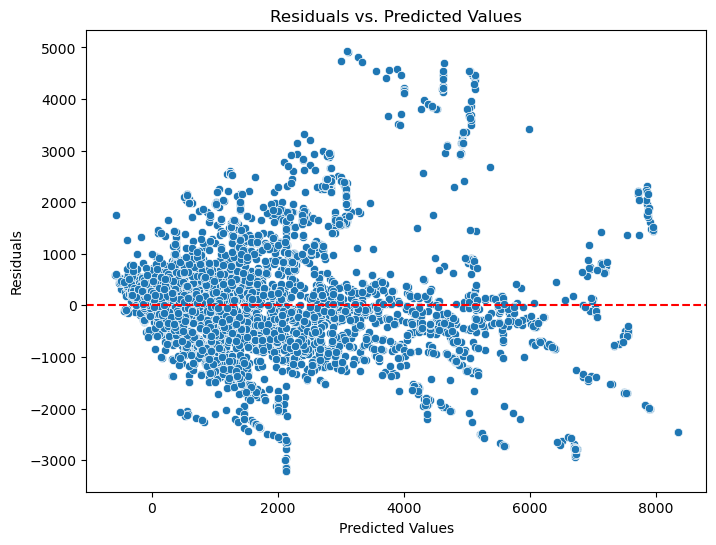

In [43]:
# Residuals vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


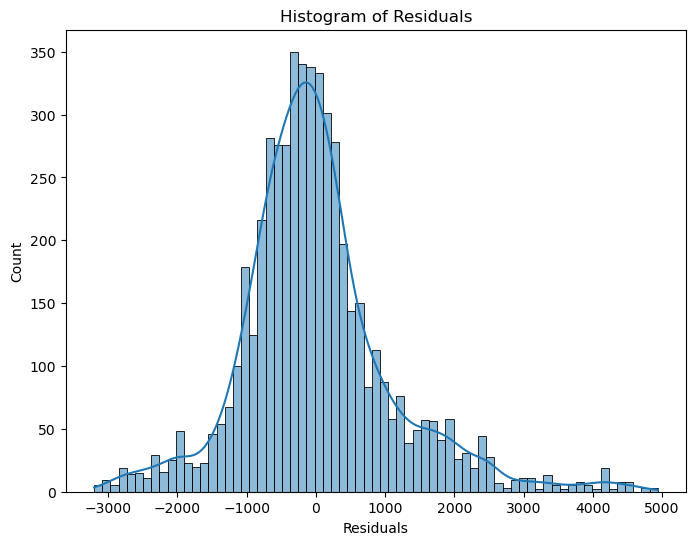

In [44]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


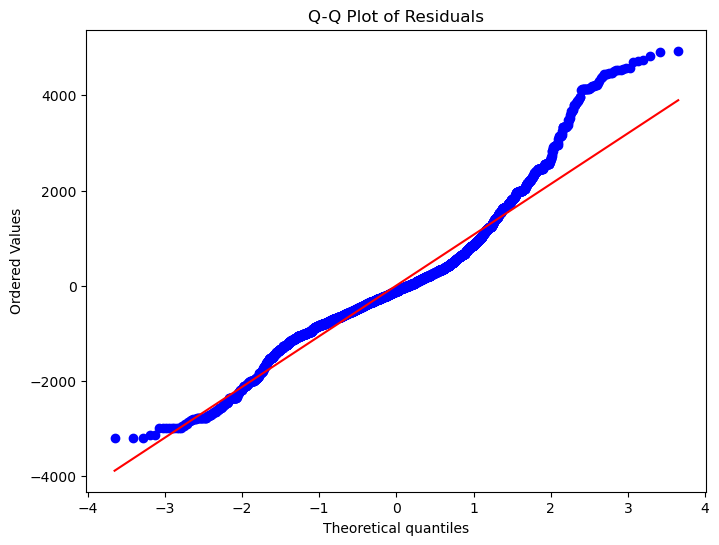

In [45]:
# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


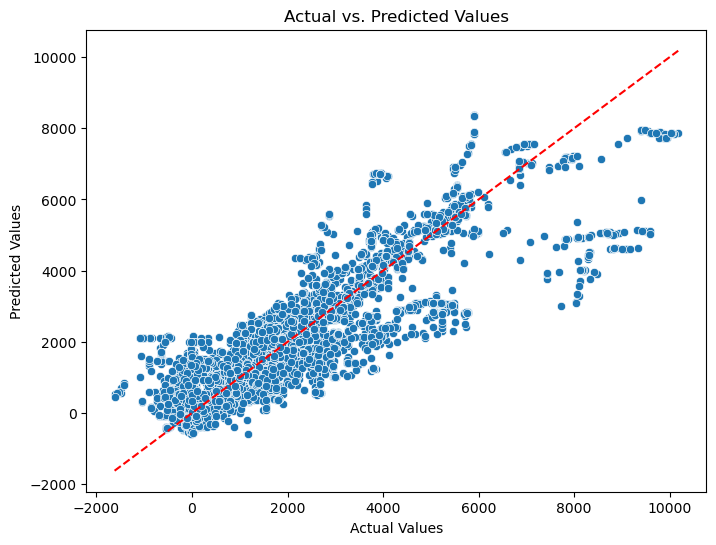

In [46]:
# Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
